# Assignment: Clustering

This assingment aims to test your understanding of clustering.

## Exercise 1

Please implement and test the following distance metrics:

a) Euclidian distance

b) Manhattan distance

c) Pearson vorrelation coefficient

Please take into account that some features for some samples could be missing.

In [1]:
import numpy as np


def Handle_Nans(sample1, sample2):
    # implement some algorithm that will remove elements in sample1 and sample2 with index i, 
    # if sample1[i] is Nan or sample2[i] is Nan
    for i in range(len(sample1) - 1, -1, -1): # iterate backwards to avoid index errors when deleting
        if np.isnan(sample1[i]) or np.isnan(sample2[i]):
            sample1 = np.delete(sample1, i)
            sample2 = np.delete(sample2, i)
    
    return sample1, sample2

def Euclidian_dist(sample1, sample2):
    sample1, sample2 = Handle_Nans(sample1, sample2)
    return np.linalg.norm(sample1 - sample2)

def Manhattan_dist(sample1, sample2):
    sample1, sample2 = Handle_Nans(sample1, sample2)
    return np.sum(np.abs(sample1 - sample2))

def Pearson_dist(sample1, sample2):
    sample1, sample2 = Handle_Nans(sample1, sample2)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)

    
    norm_sample1 = sample1 - mean1
    norm_sample2 = sample2 - mean2
    numerator = np.sum(norm_sample1 * norm_sample2)

    norm_sample1_squared = np.sum(norm_sample1 ** 2)
    norm_sample2_squared = np.sum(norm_sample2 ** 2)
    denominator = np.sqrt(norm_sample1_squared * norm_sample2_squared)

    return numerator / denominator


def main():
    sample1 = np.asarray([17, 28, 37, 23, 8, float('Nan')])
    sample2 = np.asarray([21, 35, float('Nan'), 23, 2, 5])
    
    print(Euclidian_dist(sample1, sample2))
    print(Manhattan_dist(sample1, sample2))
    print(Pearson_dist(sample1, sample2))
    
main()

10.04987562112089
17.0
0.9738876639603918


## Exercise 2

Please implement and test the silhouette score and compare its performance to silhouette_score from sklearn.metrics 

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score, silhouette_samples

def compute_elemtwise_distance(data):
    return distance_matrix(data, data)

def compute_silhouette_score_x(distance_map, labels, ind, n_clusters):
    a = []
    b = [[] for i in range(n_clusters - 1)]  # n_clusters - 1 as we have a
    for i in range(0, len(labels)):
        if i == ind:  # skip the current element
            continue
        if labels[i] == labels[ind]:  # same cluster so add to a
            a.append(distance_map[ind][i])
        else:  # different cluster so add to respective cluster
            b[labels[i] - 1].append(distance_map[ind][i]) # subtract 1 as cluster 0 is a

    a = np.mean(a) # mean distance of element to all other elements in the same cluster (as we skip x we don't need to divide by n-1)
    b = [np.mean(z) for z in b if z] # mean distance of element to all other elements in the same cluster
    b = np.nanmin(b) # get the cluster with the smallest mean distance to x

    if a < b:
        return 1 - a / b
    elif a > b:
        return b / a - 1
    else:
        return 0

def compute_silhouette_score(data, labels, n_clusters):
    distance_map = compute_elemtwise_distance(data)
    score = []
    for i in range(0, len(labels)):
        score.append(compute_silhouette_score_x(distance_map, labels, i, n_clusters))
    return np.mean(score)

def generate_data(n_samples, n_clusters):
    data, labels = make_blobs(n_samples = n_samples, centers = n_clusters,
                      random_state = 3, cluster_std = 0.6)
    return data, labels

def main():
    in_house_scores = []
    sklearn_scores = []
    diff_percentage = []

    n_samples = 1000
    n_max_clusters = 10
    for i in range(2, n_max_clusters):
        data, labels = generate_data(n_samples, i)
        in_house_scores.append(compute_silhouette_score(data, labels, i))
        sklearn_scores.append(silhouette_score(data, labels))
        diff_percentage.append((in_house_scores[-1] - sklearn_scores[-1]) / sklearn_scores[-1] * 100)
    
    
    plt.figure()
    plt.plot(range(2, n_max_clusters), in_house_scores, label = 'In-house')
    plt.plot(range(2, n_max_clusters), sklearn_scores, label = 'Sklearn')
    plt.legend()
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    #plt.savefig('silhouette_score.png')
    plt.show()
    
    plt.figure()
    plt.plot(range(2, n_max_clusters), diff_percentage)
    plt.xlabel('Number of clusters')
    plt.ylabel('Difference in percentage')
    plt.show()
main()

NameError: name 'plt' is not defined

## Exercise 3

Please compute silhouette score for different number of clusters in k-Mean algorithm. Select the optimal k with the highest silhouette score.

You are allowed to use KMeans and silhouette_score from sklearn.

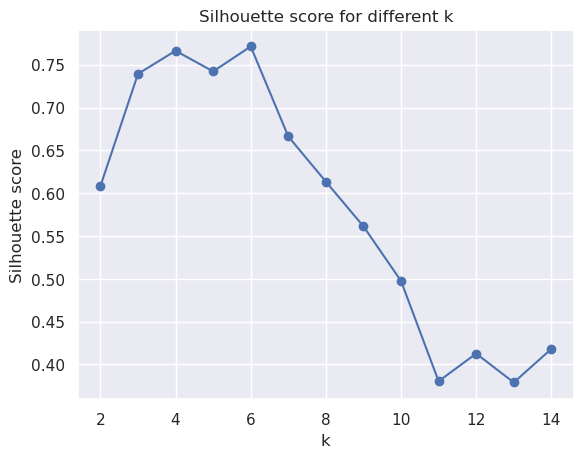

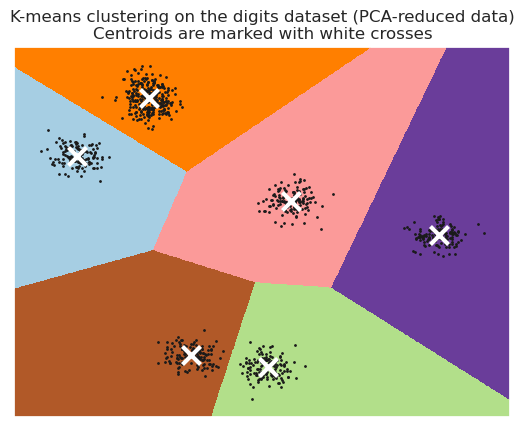

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def visualizeKMeans(data, kmeans):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white crosses')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.savefig('kmeans_clusters.png')
    plt.show()


def find_optimal_k(data, labels):
    silhouette_scores = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    
    plt.plot(range(2, 15), silhouette_scores, 'o-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score for different k')
    plt.savefig('silhouette_score_3.png')
    plt.show()

    optimal_k = range(2, 15)[np.argmax(silhouette_scores)] # get the k with the highest silhouette score
    return optimal_k

def main():
    n_clusters = 7
    plt.figure(0)
    data, labels = make_blobs(n_samples = 1000, centers = n_clusters,
                              random_state = 5, cluster_std = 0.5)
    
    k = find_optimal_k(data, labels)
    
    plt.figure(1)
    kmeans = KMeans(n_clusters = k).fit(data)
    visualizeKMeans(data, kmeans)
    
main()